In [1]:
# Целью работы являются: формулирование предположений и гипотез 
# для дальнейшего построения модели, проверка качества данных и их очистка,
# определение параметров модели.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

math = pd.read_csv('stud_math.xls')
display(math.head(10))
math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [2]:
display(pd.DataFrame(math.school.value_counts()))
math.loc[:, ['school']].info()
# пропусков в колонке нет, данные корректны 

,school
GP,349
MS,46


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [3]:
display(pd.DataFrame(math.sex.value_counts()))
math.loc[:, ['sex']].info()
# пропусков в колонке нет, данные корректны

,sex
F,208
M,187


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

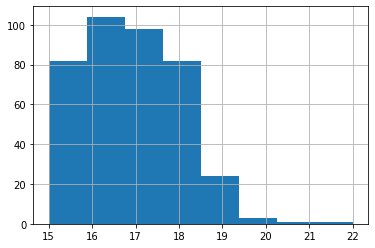

In [4]:
math.age.hist(bins=8)
math.age.describe()
# пропусков и выбросов в колонке нет

In [5]:
display(pd.DataFrame(math.address.value_counts()))
math.loc[:, ['address']].info()
# данные заполнены корректно, пропуски заменены на Nan

,address
U,295
R,83


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [6]:
display(pd.DataFrame(math.famsize.value_counts()))
math.loc[:, ['famsize']].info()
# данные заполнены корректно, пропуски заменены на Nan

,famsize
GT3,261
LE3,107


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [7]:
display(pd.DataFrame(math.Pstatus.value_counts()))
math.loc[:, ['Pstatus']].info()
# данные заполнены корректно, пропуски заменены на Nan

,Pstatus
T,314
A,36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

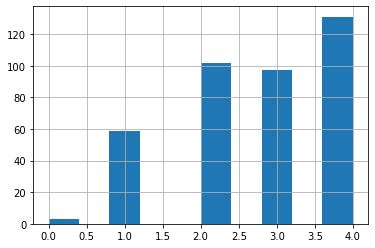

In [8]:
math.Medu.hist()
math.Medu.describe()
# данные заполнены корректно, выбросов в колонке нет

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

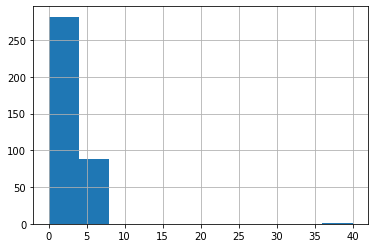

In [9]:
math.Fedu.hist()
math.Fedu.describe()
# в колонке имеются выбросы

In [10]:
math = math.loc[math.Fedu <= 4] # оставляем только корректные значения

In [11]:
display(pd.DataFrame(math.Mjob.value_counts()))
math.loc[:, ['Mjob']].info()
# данные заполнены корректно, пропуски заменены на Nan

,Mjob
other,125
services,90
at_home,57
teacher,48
health,31


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    351 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


In [12]:
display(pd.DataFrame(math.Fjob.value_counts()))
math.loc[:, ['Fjob']].info()
# данные заполнены корректно, пропуски заменены на Nan

,Fjob
other,189
services,94
teacher,26
at_home,14
health,13


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    336 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


In [13]:
display(pd.DataFrame(math.reason.value_counts()))
math.loc[:, ['reason']].info()
# данные заполнены корректно, пропуски заменены на Nan

,reason
course,128
reputation,98
home,96
other,32


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  354 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


In [14]:
display(pd.DataFrame(math.guardian.value_counts()))
math.loc[:, ['guardian']].info()
# данные заполнены корректно, пропуски заменены на Nan

,guardian
mother,236
father,78
other,26


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  340 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


count    345.000000
mean       1.449275
std        0.701664
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

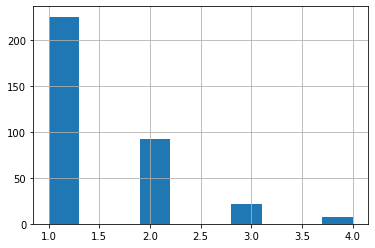

In [15]:
math.traveltime.hist()
math.traveltime.describe()
# данные корректны, выбросов нет

count    363.000000
mean       2.027548
std        0.840489
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

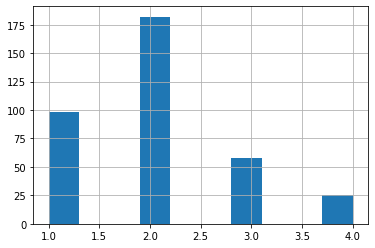

In [16]:
math.studytime.hist()
math.studytime.describe()
# данные корректны, выбросов нет

count    351.000000
mean       0.336182
std        0.748962
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

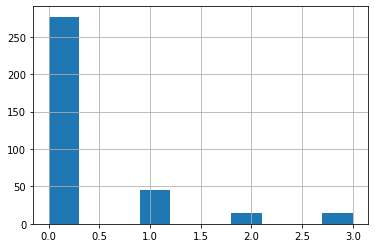

In [17]:
math.failures.hist()
math.failures.describe()
# данные корректны, выбросов нет

In [18]:
display(pd.DataFrame(math.schoolsup.value_counts()))
math.loc[:, ['schoolsup']].info()
# данные заполнены корректно, пропуски заменены на Nan

,schoolsup
no,314
yes,47


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  361 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


In [19]:
display(pd.DataFrame(math.famsup.value_counts()))
math.loc[:, ['famsup']].info()
# данные заполнены корректно, пропуски заменены на Nan

,famsup
yes,204
no,131


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  335 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


In [20]:
display(pd.DataFrame(math.paid.value_counts()))
math.loc[:, ['paid']].info()
# данные заполнены корректно, пропуски заменены на Nan

,paid
no,188
yes,145


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    333 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


In [21]:
display(pd.DataFrame(math.activities.value_counts()))
math.loc[:, ['activities']].info()
# данные заполнены корректно, пропуски заменены на Nan

,activities
yes,180
no,176


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  356 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


In [22]:
display(pd.DataFrame(math.nursery.value_counts()))
math.loc[:, ['nursery']].info()
# данные заполнены корректно, пропуски заменены на Nan

,nursery
yes,279
no,75


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  354 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


In [23]:
display(pd.DataFrame(math.higher.value_counts()))
math.loc[:, ['higher']].info()
# данные заполнены корректно, пропуски заменены на Nan

,higher
yes,333
no,19


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  352 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


In [24]:
display(pd.DataFrame(math.internet.value_counts()))
math.loc[:, ['internet']].info()
# данные заполнены корректно, пропуски заменены на Nan

,internet
yes,283
no,54


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  337 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


In [25]:
display(pd.DataFrame(math.romantic.value_counts()))
math.loc[:, ['romantic']].info()
# данные заполнены корректно, пропуски заменены на Nan

,romantic
no,226
yes,116


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  342 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


count    346.000000
mean       3.936416
std        0.939629
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

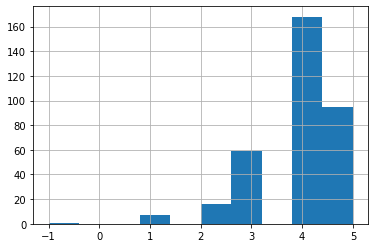

In [26]:
math.famrel.hist()
math.famrel.describe()
# есть выбросы

In [27]:
math = math.loc[math.famrel >= 1] # оставляем только корректные значения

count    336.000000
mean       3.229167
std        1.003508
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

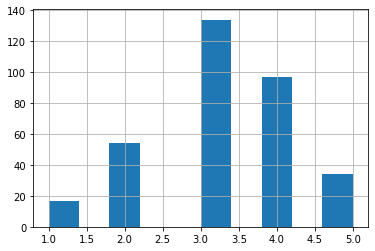

In [28]:
math.freetime.hist()
math.freetime.describe()
# данные корректны, выбросов нет

count    337.000000
mean       3.106825
std        1.104852
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

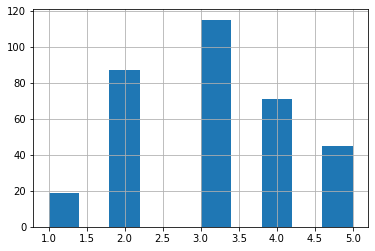

In [29]:
math.goout.hist()
math.goout.describe()
# данные корректны, выбросов нет

count    332.000000
mean       3.469880
std        1.386925
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

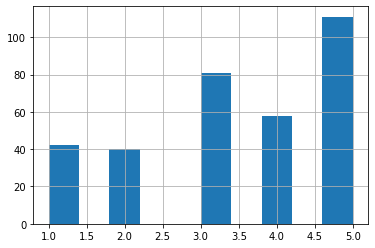

In [30]:
math.health.hist()
math.health.describe()
# данные корректны, выбросов нет

count    333.000000
mean       7.315315
std       24.755302
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

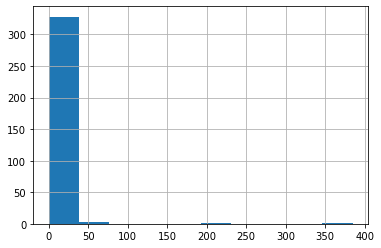

In [31]:
math.absences.hist()
math.absences.describe()
# в данных есть выбросы

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


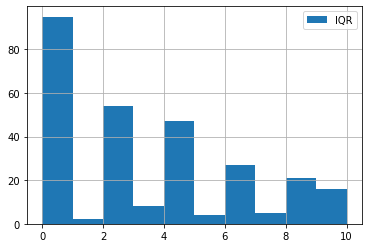

In [32]:
IQR = math.absences.quantile(0.75) - math.absences.quantile(0.25)
perc25 = math.absences.quantile(0.25)
perc75 = math.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
math.absences.loc[math.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend();

In [33]:
math.absences[math.absences >= 20].count() # находим количество выбросов

18

In [34]:
math.absences[math.absences >= 20].count() / math.shape[0] 
# доля выбросов в этой колонке > 5%, поэтому удалим только наименее вероятные значения

0.05217391304347826

In [35]:
math = math.loc[math.absences <= 100] # удаляем пропуски, превышающие 100

In [36]:
math.shape[0] 

331

count    326.000000
mean      52.147239
std       22.401712
min        0.000000
25%       41.250000
50%       55.000000
75%       65.000000
max      100.000000
Name: score, dtype: float64

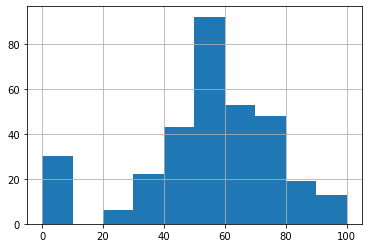

In [38]:
math.score.hist()
math.score.describe()
# в данных есть выбросы

In [45]:
IQR = math.score.quantile(0.75) - math.score.quantile(0.25)
perc25 = math.score.quantile(0.25)
perc75 = math.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
# также по гистограмме видно, что нулевое значение является выбросом

25-й перцентиль: 41.25, 75-й перцентиль: 65.0, IQR: 23.75,  Границы выбросов: [5.625, 100.625].


In [46]:
math = math.loc[math.score > 0] # удаляем выбросы

In [49]:
math.drop(['studytime, granular'], inplace = True, axis = 1)
# удаляем лишние колонки

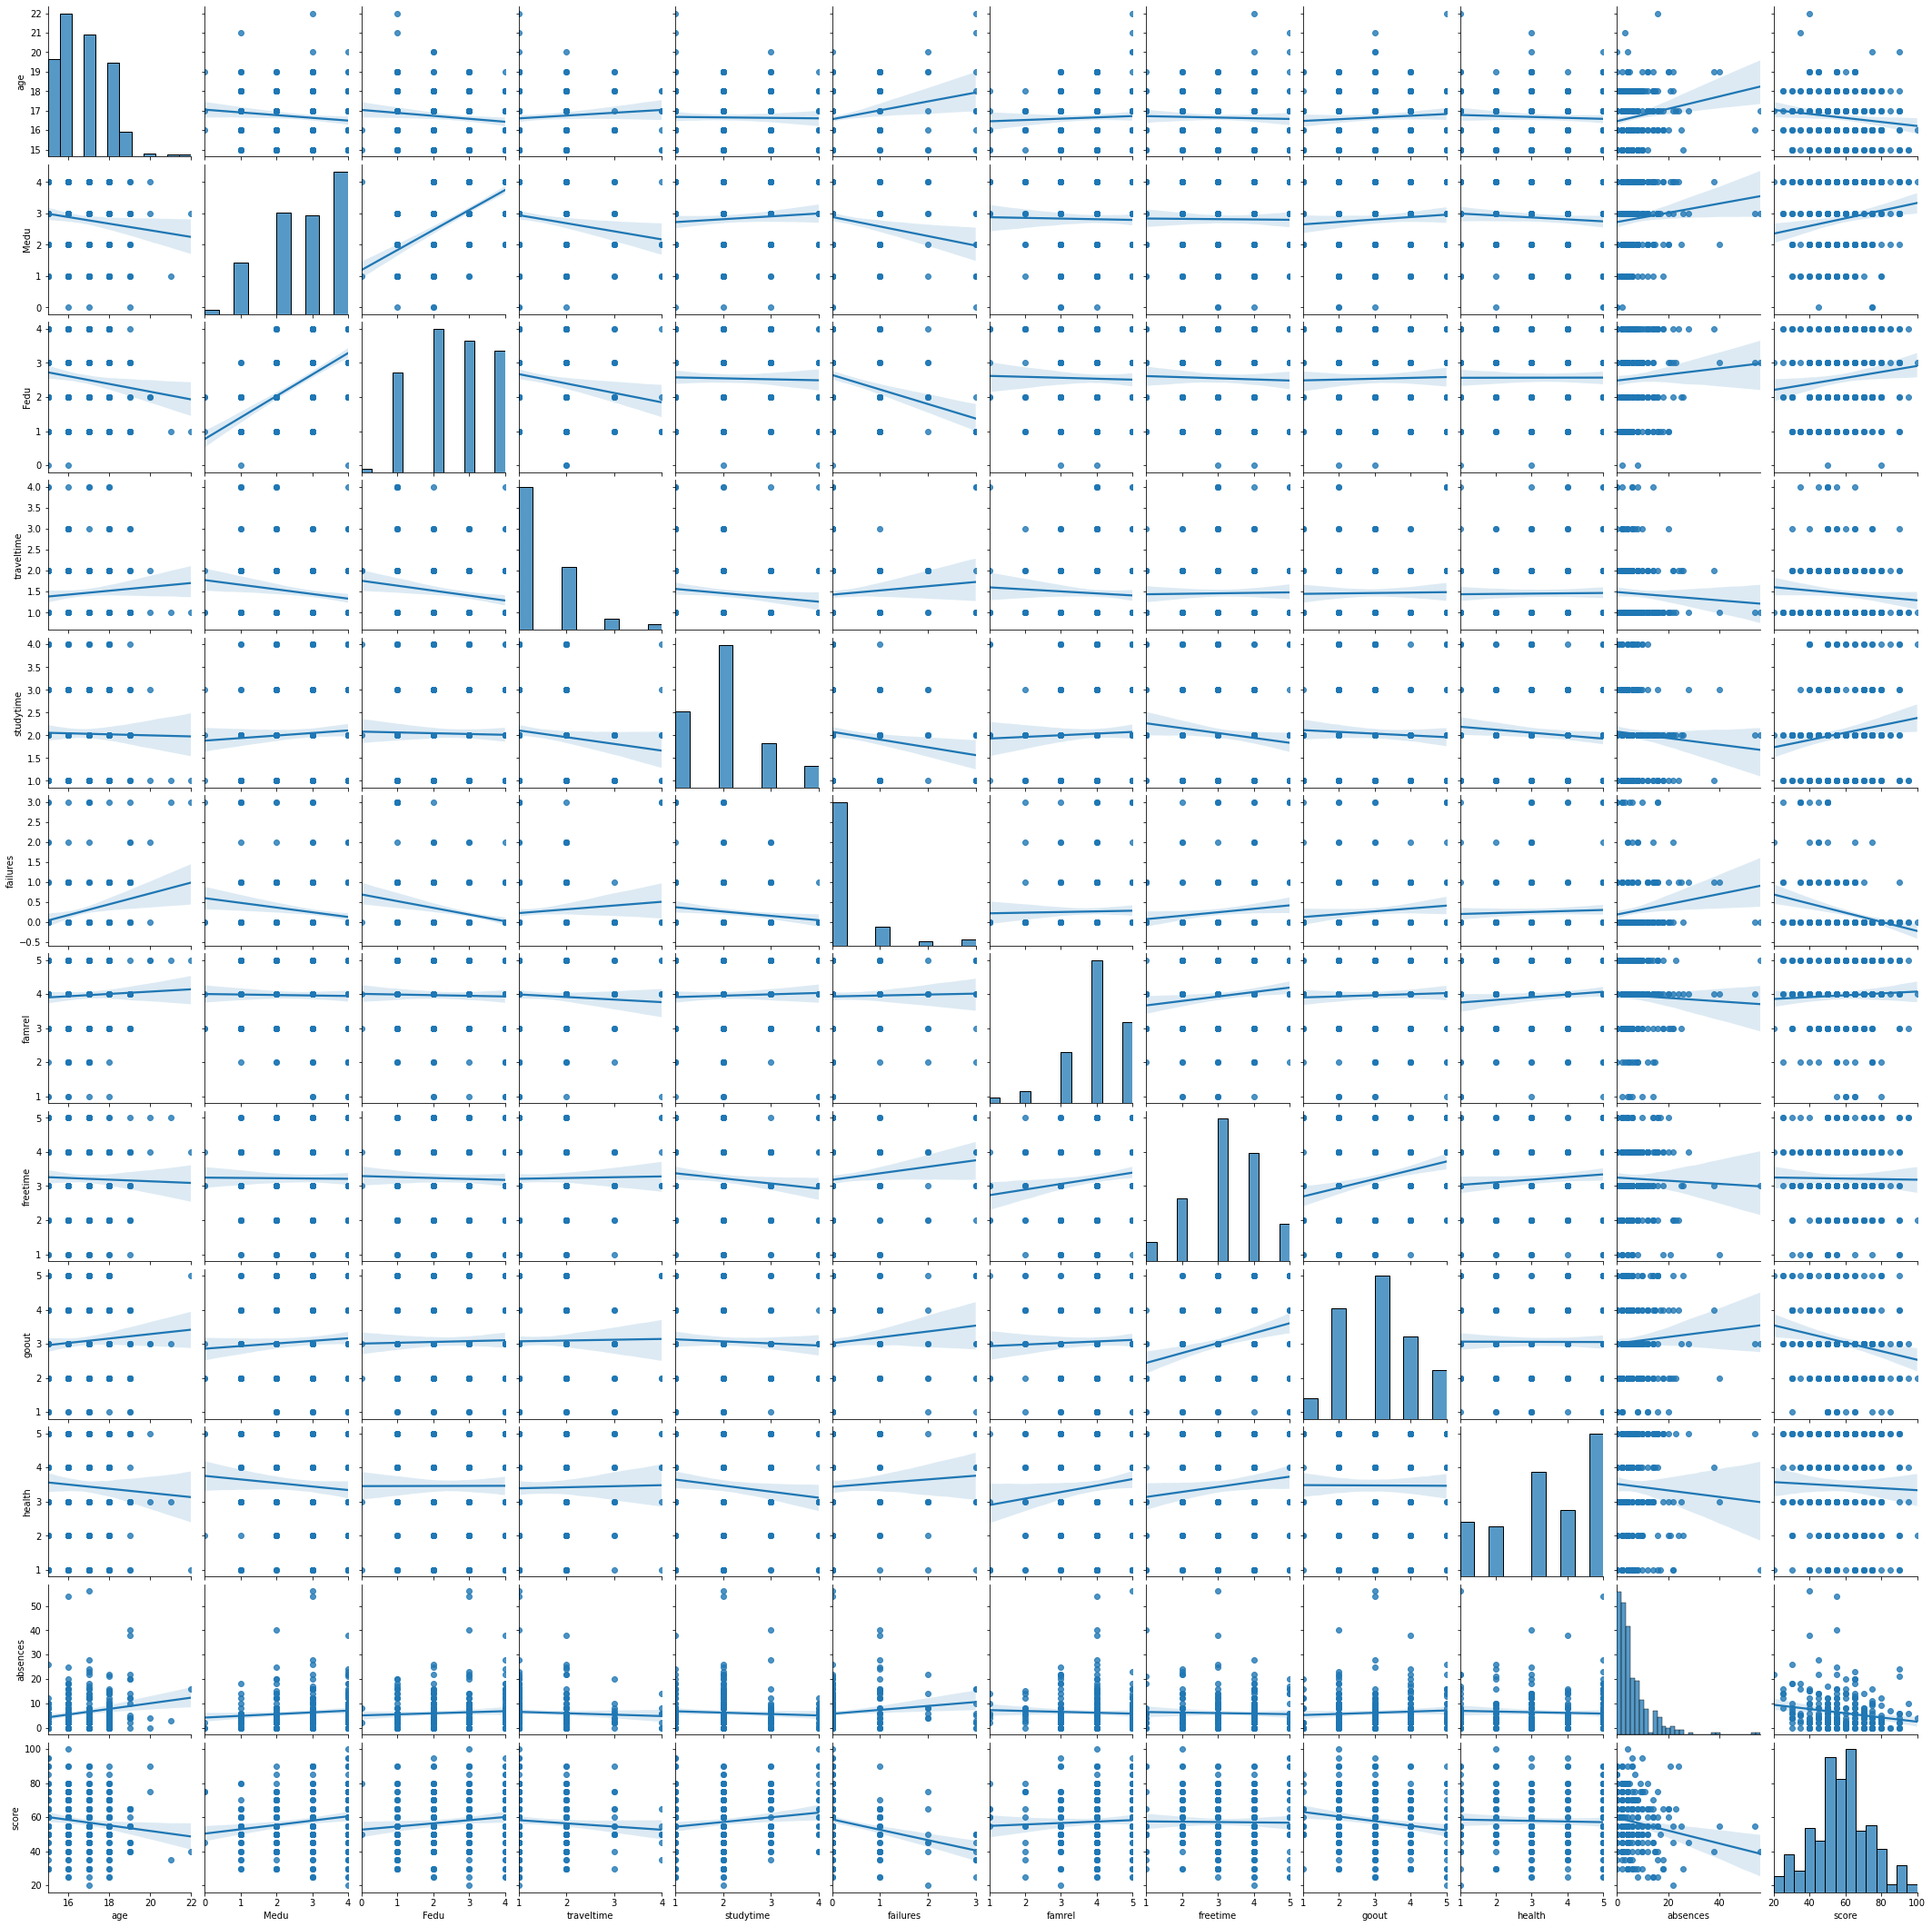

In [52]:
sns.pairplot(math, kind = 'reg')

In [53]:
math.corr()
# наибольшее влияние на score оказывают Medu, studytime, failures, goout, absences

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.121777,-0.131275,0.081641,-0.016761,0.248556,0.047913,-0.029774,0.075850,-0.055506,0.191553,-0.129530
Medu,-0.121777,1.000000,0.633534,-0.168856,0.071598,-0.189178,-0.017684,-0.009434,0.076914,-0.080423,0.102373,0.176149
Fedu,-0.131275,0.633534,1.000000,-0.180165,-0.022392,-0.266709,-0.022907,-0.030331,0.024430,0.001726,0.062221,0.127480
traveltime,0.081641,-0.168856,-0.180165,1.000000,-0.122454,0.097416,-0.060292,0.016263,0.015348,0.015257,-0.053440,-0.085483
studytime,-0.016761,0.071598,-0.022392,-0.122454,1.000000,-0.136115,0.038382,-0.126557,-0.048393,-0.107636,-0.063713,0.148863
failures,0.248556,-0.189178,-0.266709,0.097416,-0.136115,1.000000,0.021303,0.128123,0.110760,0.052505,0.143490,-0.262781
famrel,0.047913,-0.017684,-0.022907,-0.060292,0.038382,0.021303,1.000000,0.147038,0.037946,0.122917,-0.042859,0.047958
freetime,-0.029774,-0.009434,-0.030331,0.016263,-0.126557,0.128123,0.147038,1.000000,0.272872,0.107494,-0.031848,-0.012593
goout,0.075850,0.076914,0.024430,0.015348,-0.048393,0.110760,0.037946,0.272872,1.000000,-0.003843,0.066747,-0.183775
health,-0.055506,-0.080423,0.001726,0.015257,-0.107636,0.052505,0.122917,0.107494,-0.003843,1.000000,-0.052142,-0.033492


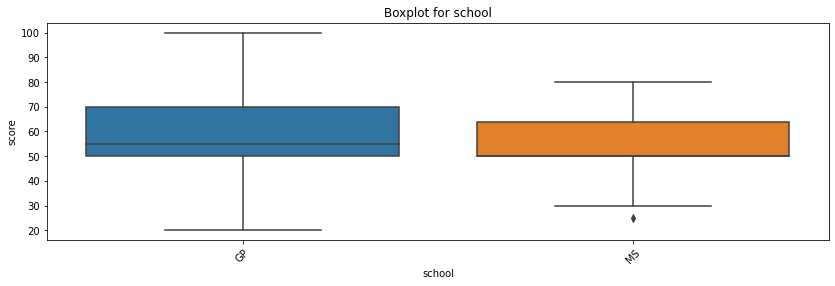

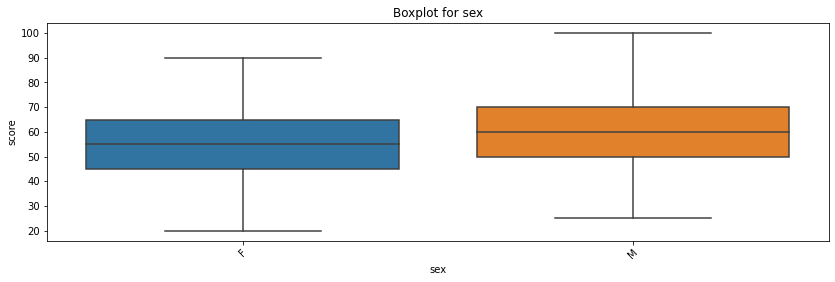

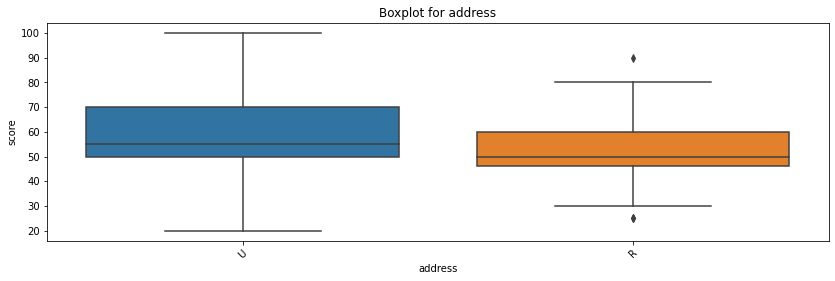

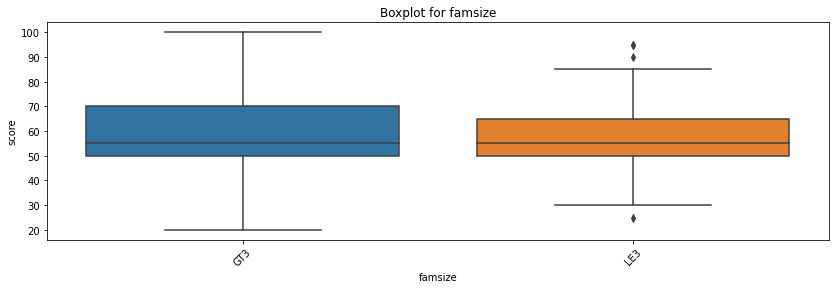

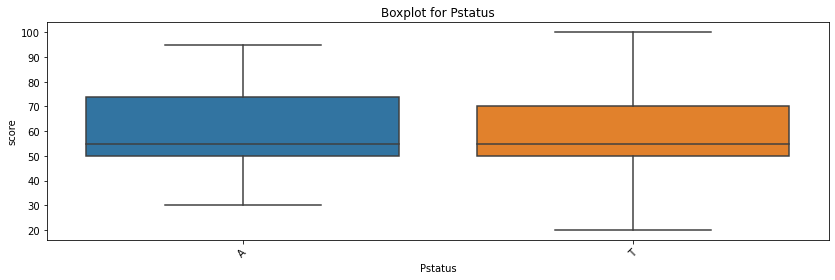

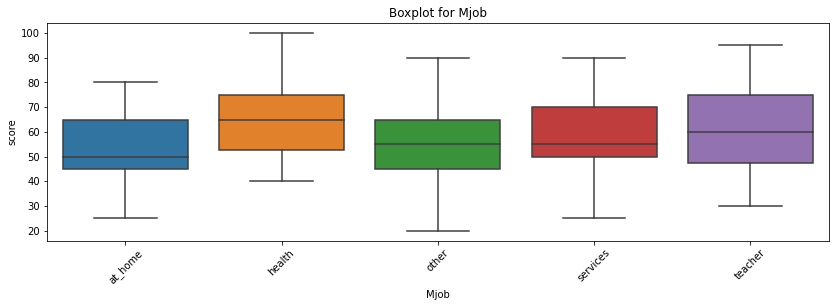

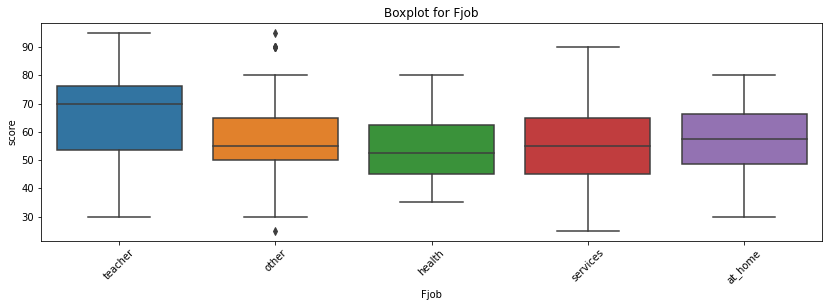

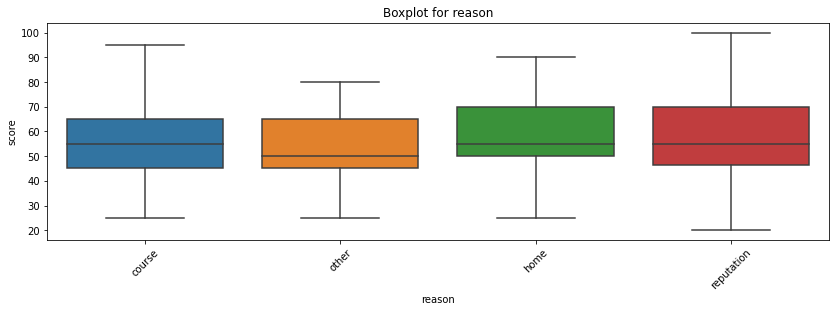

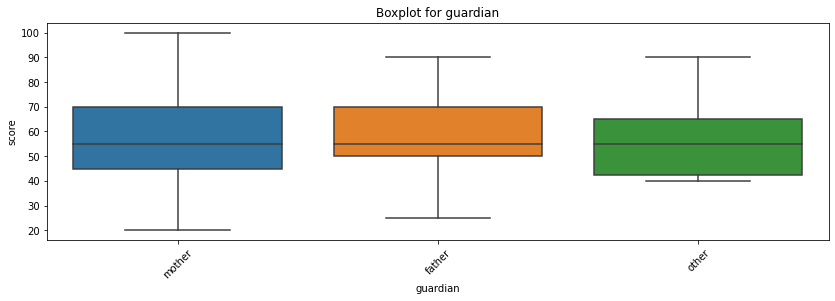

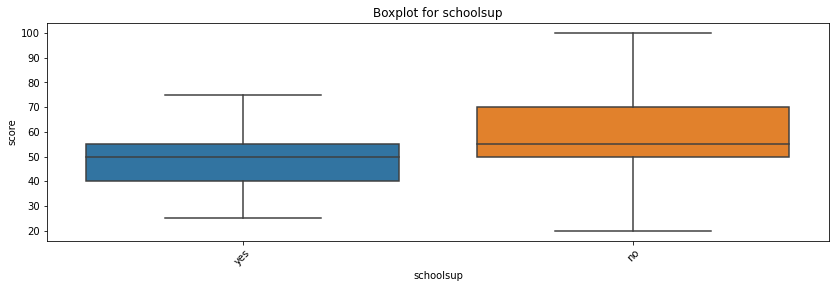

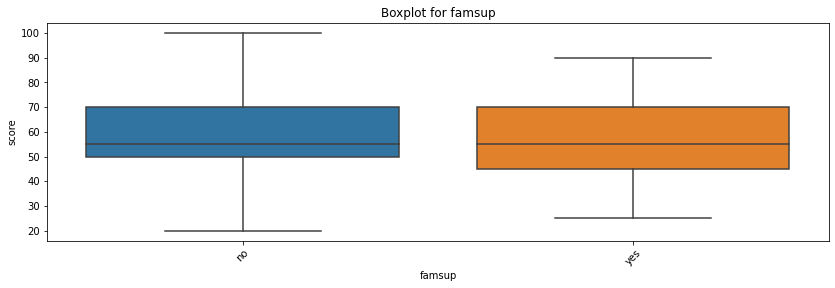

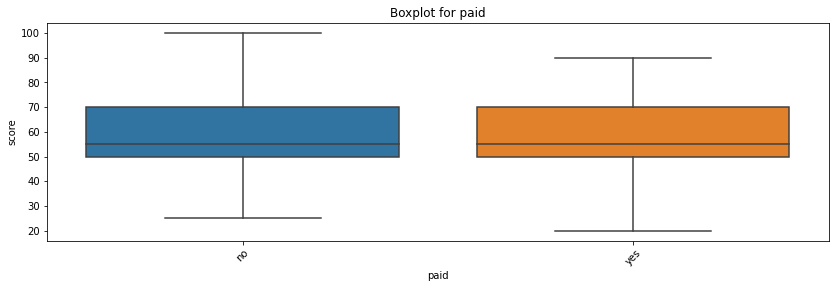

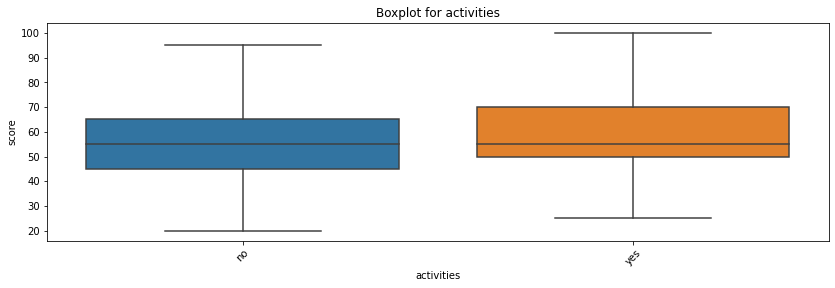

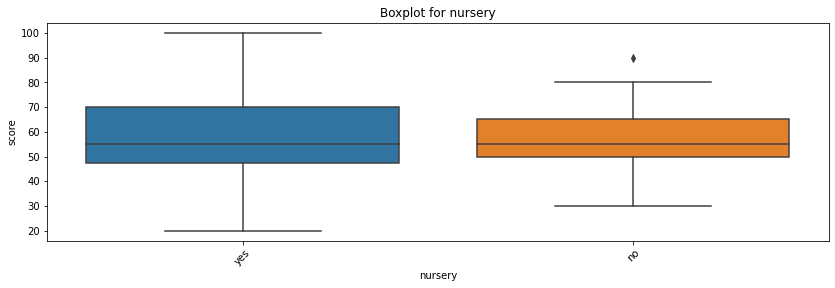

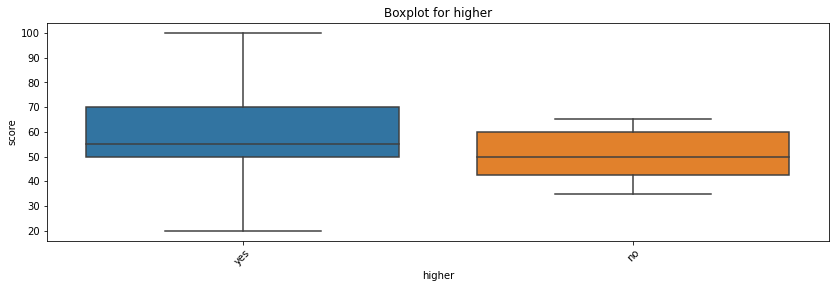

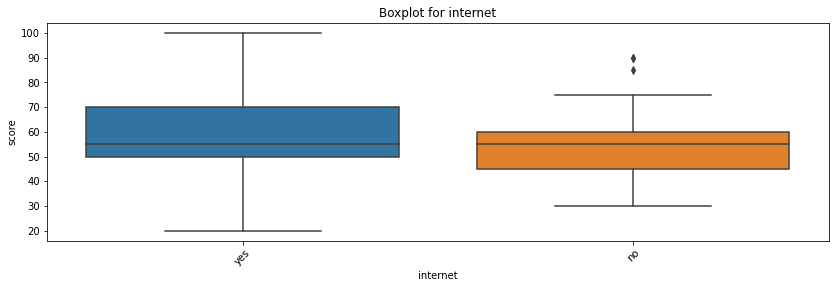

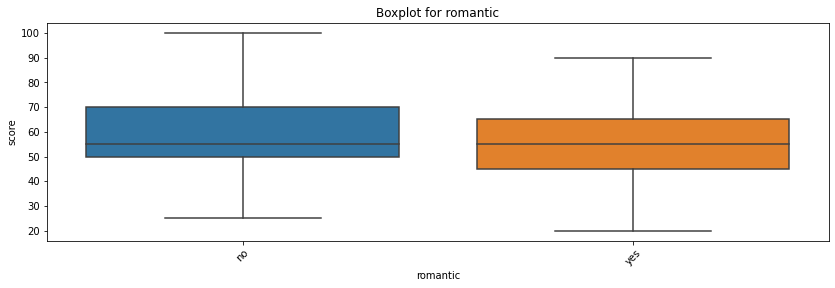

In [60]:
def get_boxplt(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=math.loc[math.loc[:, column].isin(math.loc[:, column].value_counts().index[:])], 
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 
            'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 
            'famsup', 'paid', 'activities', 'nursery', 'higher', 
            'internet', 'romantic']:
    get_boxplt(col)

In [61]:
def get_stat_dif(column):
    cols = math.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(math.loc[math.loc[:, column] == comb[0], 'score'], 
                        math.loc[math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 
            'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 
            'famsup', 'paid', 'activities', 'nursery', 'higher', 
            'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки schoolsup


In [62]:
math_for_model = math.loc[:, ['Medu', 'studytime', 'failures', 'goout', 'absences', 'address', 'Mjob', 'schoolsup']]
math_for_model.head()

,Medu,studytime,failures,goout,absences,address,Mjob,schoolsup
0,4.0,2.0,0.0,4.0,6.0,U,at_home,yes
1,1.0,2.0,0.0,3.0,4.0,U,at_home,no
2,1.0,2.0,3.0,2.0,10.0,U,at_home,yes
3,4.0,3.0,0.0,2.0,2.0,U,health,no
4,3.0,2.0,0.0,2.0,4.0,U,other,no


Итак, в результате EDA для анализа влияния условий жизни учащихся на их успеваемость по математике были получены следующие выводы:

В данных достаточно мало пустых значений.
Выбросы найдены только в столбцах с оценкой по математике и пропусками, а также совсем незначительные погрешности в столбцах, содержащих образование отца и оценивающие отношения в семье, что позволяет сделать вывод о том, что данные достаточно чистые.
Отрицательная корреляция параметра age и score может говорить о том, что с увеличением возраста оценки по математике становятся ниже.
Также можно сделать вывод, что самые высокие оценки по математике получают учащиеся, чьи отцы работают учителями, а матери - учителями или в системе здравоохранения. В целом образование и место работы матери оказывают большее влияние на успеваемость, чем аналогичные параметры отцов.
Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это Medu, studytime, failures, goout, absences, address, Mjob, schoolsup.